In [1]:
import pandas as pd
import datetime as dt
import requests
import json
import os

In [2]:
# make sure the notebook cells are broad enough, not necessary when using a simple py file
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# fetch covid infection numbers up till today
def getDataForToday():
    todaysDateStr = dt.datetime.today().strftime('%Y-%m-%d')
    # filename for loading or saving
    filename = 'CovidData-'+todaysDateStr+'.csv'
    if os.path.exists(filename):
        # load from file if file for today exists
        df = pd.read_csv(filename)
    else:
        # get from source when file doesn't exist
        url = 'https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.geojson'
        resp = requests.get(url)
        jsonified = resp.json()
        # already make file smaller by omitting useless stuff
        featurelist = [feat['properties'] for feat in jsonified['features']]
        df = pd.DataFrame(featurelist)
        df.drop(columns=['Altersgruppe2'], inplace=True)
        # save data for today to file
        df.to_csv(filename)
    
    return df

In [4]:
df = getDataForToday()
df

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn
0,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-09-30T00:00:00Z,01001,"13.03.2021, 00:00 Uhr",0,-9,2020-09-30T00:00:00Z,0,1,0
1,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-10-29T00:00:00Z,01001,"13.03.2021, 00:00 Uhr",0,-9,2020-10-29T00:00:00Z,0,1,0
2,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-03T00:00:00Z,01001,"13.03.2021, 00:00 Uhr",0,-9,2020-11-03T00:00:00Z,0,1,0
3,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-20T00:00:00Z,01001,"13.03.2021, 00:00 Uhr",0,-9,2020-11-19T00:00:00Z,0,1,1
4,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-23T00:00:00Z,01001,"13.03.2021, 00:00 Uhr",0,-9,2020-11-18T00:00:00Z,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395529,1395530,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021-02-27T00:00:00Z,16077,"13.03.2021, 00:00 Uhr",0,-9,2021-02-27T00:00:00Z,-9,0,0
1395530,1395531,16,Thüringen,LK Altenburger Land,A80+,W,2,0,2021-03-06T00:00:00Z,16077,"13.03.2021, 00:00 Uhr",0,-9,2021-03-06T00:00:00Z,-9,0,0
1395531,1395532,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021-03-10T00:00:00Z,16077,"13.03.2021, 00:00 Uhr",0,-9,2021-03-10T00:00:00Z,-9,0,0
1395532,1395533,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021-03-11T00:00:00Z,16077,"13.03.2021, 00:00 Uhr",0,-9,2021-03-11T00:00:00Z,-9,0,0


In [5]:
# convert time types and sort rows by date
df['Meldedatum'] = pd.to_datetime(df['Meldedatum'], format="%Y/%m/%d %H:%M:%S")
df['Refdatum'] = pd.to_datetime(df['Refdatum'], format="%Y/%m/%d %H:%M:%S")
df.sort_values(by="Meldedatum", inplace=True)

In [6]:
# df['AnzahlFall'].max()
# show most recent infection cases 
df.tail(11)

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn
478155,478156,6,Hessen,LK Darmstadt-Dieburg,A15-A34,W,1,0,2021-03-12 00:00:00+00:00,06432,"13.03.2021, 00:00 Uhr",1,-9,2021-03-11 00:00:00+00:00,-9,0,1
478156,478157,6,Hessen,LK Darmstadt-Dieburg,A15-A34,W,4,0,2021-03-12 00:00:00+00:00,06432,"13.03.2021, 00:00 Uhr",1,-9,2021-03-12 00:00:00+00:00,-9,0,0
478994,478995,6,Hessen,LK Darmstadt-Dieburg,A15-A34,M,1,0,2021-03-12 00:00:00+00:00,06432,"13.03.2021, 00:00 Uhr",1,-9,2021-03-09 00:00:00+00:00,-9,0,1
478995,478996,6,Hessen,LK Darmstadt-Dieburg,A15-A34,M,3,0,2021-03-12 00:00:00+00:00,06432,"13.03.2021, 00:00 Uhr",1,-9,2021-03-12 00:00:00+00:00,-9,0,0
479180,479181,6,Hessen,LK Darmstadt-Dieburg,A05-A14,M,1,0,2021-03-12 00:00:00+00:00,06432,"13.03.2021, 00:00 Uhr",1,-9,2021-03-12 00:00:00+00:00,-9,0,0
479319,479320,6,Hessen,LK Darmstadt-Dieburg,A05-A14,W,1,0,2021-03-12 00:00:00+00:00,06432,"13.03.2021, 00:00 Uhr",1,-9,2021-03-10 00:00:00+00:00,-9,0,1
479320,479321,6,Hessen,LK Darmstadt-Dieburg,A05-A14,W,1,0,2021-03-12 00:00:00+00:00,06432,"13.03.2021, 00:00 Uhr",1,-9,2021-03-12 00:00:00+00:00,-9,0,0
480776,480777,6,Hessen,LK Darmstadt-Dieburg,A35-A59,W,1,0,2021-03-12 00:00:00+00:00,06432,"13.03.2021, 00:00 Uhr",1,-9,2021-03-11 00:00:00+00:00,-9,0,1
480777,480778,6,Hessen,LK Darmstadt-Dieburg,A35-A59,W,3,0,2021-03-12 00:00:00+00:00,06432,"13.03.2021, 00:00 Uhr",1,-9,2021-03-12 00:00:00+00:00,-9,0,0
477716,477717,6,Hessen,LK Bergstraße,A80+,M,1,0,2021-03-12 00:00:00+00:00,06431,"13.03.2021, 00:00 Uhr",1,-9,2021-03-08 00:00:00+00:00,-9,0,1


In [7]:
sum(df["AnzahlTodesfall"])

73297

In [8]:
sum(df["AnzahlFall"])

2558181

In [9]:
df.nlargest(10, 'AnzahlFall')

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn
361211,361212,5,Nordrhein-Westfalen,LK Gütersloh,A35-A59,M,148,0,2020-06-17 00:00:00+00:00,05754,"13.03.2021, 00:00 Uhr",0,-9,2020-06-16 00:00:00+00:00,0,148,1
826256,826257,9,Bayern,SK München,A35-A59,M,145,0,2020-12-15 00:00:00+00:00,09162,"13.03.2021, 00:00 Uhr",0,-9,2020-12-15 00:00:00+00:00,0,145,0
1253723,1253724,14,Sachsen,LK Zwickau,A35-A59,W,133,0,2020-12-16 00:00:00+00:00,14524,"13.03.2021, 00:00 Uhr",0,-9,2020-12-16 00:00:00+00:00,0,133,0
826069,826070,9,Bayern,SK München,A35-A59,M,125,0,2020-11-19 00:00:00+00:00,09162,"13.03.2021, 00:00 Uhr",0,-9,2020-11-19 00:00:00+00:00,0,125,0
826055,826056,9,Bayern,SK München,A35-A59,M,123,0,2020-11-17 00:00:00+00:00,09162,"13.03.2021, 00:00 Uhr",0,-9,2020-11-17 00:00:00+00:00,0,123,0
826279,826280,9,Bayern,SK München,A35-A59,M,122,0,2020-12-17 00:00:00+00:00,09162,"13.03.2021, 00:00 Uhr",0,-9,2020-12-17 00:00:00+00:00,0,122,0
828305,828306,9,Bayern,SK München,A35-A59,W,120,0,2020-12-15 00:00:00+00:00,09162,"13.03.2021, 00:00 Uhr",0,-9,2020-12-15 00:00:00+00:00,0,120,0
1253730,1253731,14,Sachsen,LK Zwickau,A35-A59,W,120,0,2020-12-22 00:00:00+00:00,14524,"13.03.2021, 00:00 Uhr",0,-9,2020-12-22 00:00:00+00:00,0,120,0
826367,826368,9,Bayern,SK München,A35-A59,M,120,0,2020-12-29 00:00:00+00:00,09162,"13.03.2021, 00:00 Uhr",0,-9,2020-12-29 00:00:00+00:00,0,120,0
823559,823560,9,Bayern,SK München,A15-A34,W,119,0,2020-11-19 00:00:00+00:00,09162,"13.03.2021, 00:00 Uhr",0,-9,2020-11-19 00:00:00+00:00,0,119,0


In [10]:
df['NeuerTodesfall'].value_counts()

-9    1335891
 0      59397
 1        242
-1          4
Name: NeuerTodesfall, dtype: int64

In [11]:
# Show regions. This helps to see if entries are missing 
df['Bundesland'].unique()
# df['Landkreis'].unique()

array(['Nordrhein-Westfalen', 'Berlin', 'Saarland', 'Bayern',
       'Niedersachsen', 'Brandenburg', 'Baden-Württemberg',
       'Rheinland-Pfalz', 'Hessen', 'Schleswig-Holstein', 'Hamburg',
       'Bremen', 'Sachsen', 'Mecklenburg-Vorpommern', 'Thüringen',
       'Sachsen-Anhalt'], dtype=object)

In [12]:
# kreis_grouped = df.groupby(['Landkreis'])
# if you want to group cases by county/kreis

def filterBy(dataFrame, byWhat, category):
    filteredDF = dataFrame[dataFrame[byWhat] == category]
    return filteredDF

def filterByRegion(dataFrame, bundesland):
    return filterBy(dataFrame, 'Bundesland', bundesland)

def filterByCounty(dataFrame, county):
    return filterBy(dataFrame, 'Landkreis', county)

# ToDo: add functions to filter by multiple regions/counties
# -> get all results which are in either of those elements in the list

berlindf = filterByRegion(df, 'Berlin')
berlindf['Landkreis'].unique()

array(['SK Berlin Neukölln', 'SK Berlin Tempelhof-Schöneberg',
       'SK Berlin Mitte', 'SK Berlin Marzahn-Hellersdorf',
       'SK Berlin Friedrichshain-Kreuzberg', 'SK Berlin Pankow',
       'SK Berlin Reinickendorf', 'SK Berlin Charlottenburg-Wilmersdorf',
       'SK Berlin Spandau', 'SK Berlin Lichtenberg',
       'SK Berlin Steglitz-Zehlendorf', 'SK Berlin Treptow-Köpenick'],
      dtype=object)

In [13]:
# (some experiments/examples)
# kreis_grouped.get_group('SK Berlin Lichtenberg').tail(20)
# berlindf = df[df['Bundesland'] == 'Berlin']
# 'LK Vorpommern-Greifswald', 'SK Berlin Lichtenberg', 'SK Halle'
# df

In [14]:

currentSource = 'Berlin'
# bezirke = False  # for later
sourceDict = {'Germany': {'name': 'Germany', 'color': 'k'}, 'Berlin': {'name': 'Berlin', 'color': 'purple'}, 
              'MeckPom': {'name': 'Mecklenburg-Vorpommern', 'color': 'darkgreen'},
             'Sachsen': {'name': 'Sachsen', 'color': 'orange'}, }

def chooseRegion(dataFrame, region='Germany'):
    if region != 'Germany':
        return filterByRegion(dataFrame, sourceDict[region]['name'])
    else:
        return dataFrame

newDF = chooseRegion(df, currentSource)
yName = 'Infektionen' + ' ' + sourceDict[currentSource]['name']

# if currentSource != 'Berlin' or not bezirke:
#     newDF.tail(10)
# df['Landkreis'].value_counts()



In [15]:
def getTimeSeriesInfectionData(df, region):
    infectionDaysGroup = df.groupby('Meldedatum')
    infectionDays = df['Meldedatum']
    yName = 'Infektionen' + ' ' + sourceDict[region]['name']

    frame = {'Meldedatum': infectionDays}
    infectionsPerDay = pd.DataFrame(frame)
    infectionsPerDay.drop_duplicates(inplace=True)
    infectionsPerDay.set_index('Meldedatum', inplace=True)
    # infectionsPerDay[region] = infectionDaysGroup['AnzahlFall'].apply(lambda x: x.sum())
    infectionsPerDay[yName] = infectionDaysGroup['AnzahlFall'].apply(lambda x: x.sum())
    infectionsPerDay['Deaths'] = infectionDaysGroup['AnzahlTodesfall'].apply(lambda x: x.sum())
    infectionsPerDay['7dayAverage'] = infectionsPerDay[yName].rolling(7).sum()/7
    infectionsPerDay['7dayAverage'] = infectionsPerDay['7dayAverage'].iloc[:-1]
    infectionsPerDay['Deaths7dayAverage'] = infectionsPerDay['Deaths'].rolling(7).sum()/7

    return infectionsPerDay

infectionsPerDay = getTimeSeriesInfectionData(newDF, 'Germany')


In [16]:
# most recent days with their respective infection numbers and death tolls
infectionsPerDay.tail(20)
# infectionsPerDay[yName].tail(20)

,Infektionen Germany,Deaths,7dayAverage,Deaths7dayAverage
Meldedatum,,,,
2021-02-21 00:00:00+00:00,11,1,306.714286,5.000000
2021-02-22 00:00:00+00:00,424,6,312.142857,4.000000
2021-02-23 00:00:00+00:00,477,3,327.142857,3.857143
2021-02-24 00:00:00+00:00,484,7,332.857143,4.000000
2021-02-25 00:00:00+00:00,463,3,343.714286,3.428571
2021-02-26 00:00:00+00:00,477,5,358.857143,3.714286
2021-02-27 00:00:00+00:00,137,1,353.285714,3.714286
2021-02-28 00:00:00+00:00,28,0,355.714286,3.571429
2021-03-01 00:00:00+00:00,514,6,368.571429,3.571429


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_for_table(tab, yLabel, region):
    allPlots = []
    allPlots.append(tab.plot(y=yLabel, color=sourceDict[region]['color']))
    allPlots.append(tab.plot(y='7dayAverage', color=sourceDict[region]['color']))
    allPlots.append(tab.plot(y='Deaths', color='red'))
    allPlots.append(tab.plot(y='Deaths7dayAverage', color='red'))

    for pl in allPlots:
        pl.axes.tick_params(colors='#99ffee')
        pl.axes.xaxis.get_label().set_color('#99ffee')

# plot_for_table(infectionsPerDay, yName)

In [18]:
def call_plot_for_region(region):
    regionDF = chooseRegion(df, region)
    regionalInfectionData = getTimeSeriesInfectionData(regionDF, region)
    yName = 'Infektionen' + ' ' + sourceDict[region]['name']
    plot_for_table(regionalInfectionData, yName, region)

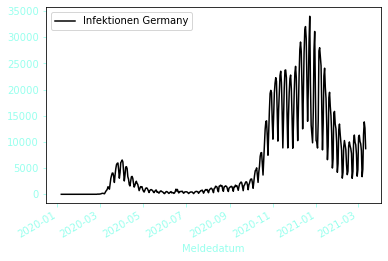

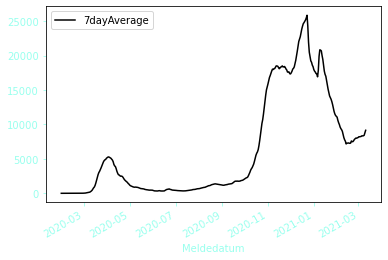

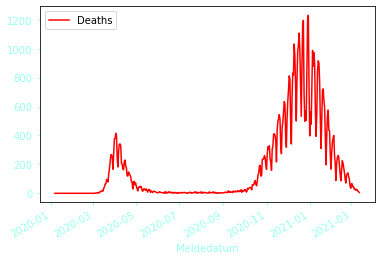

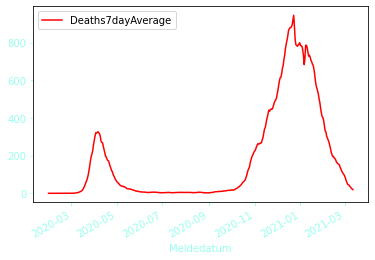

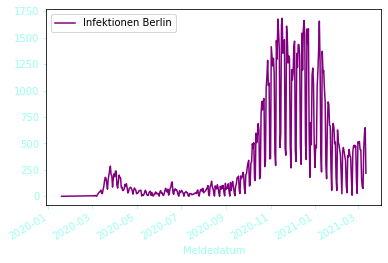

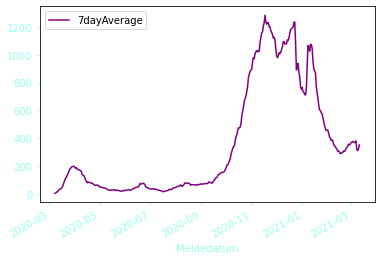

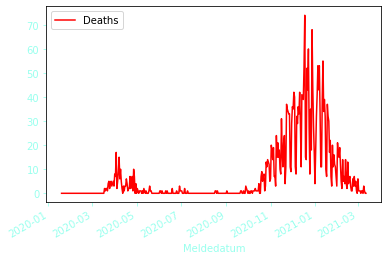

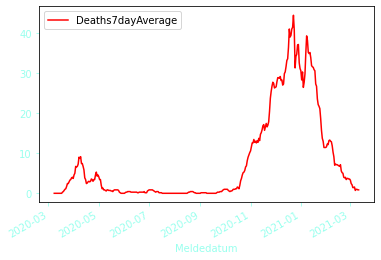

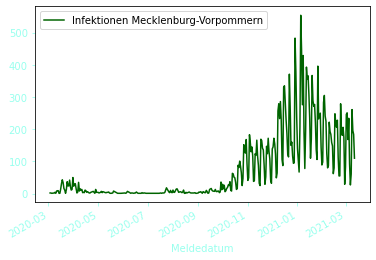

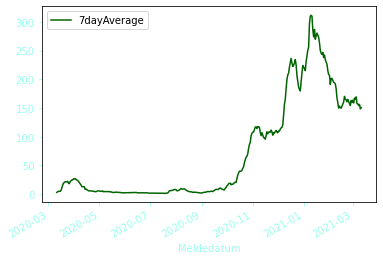

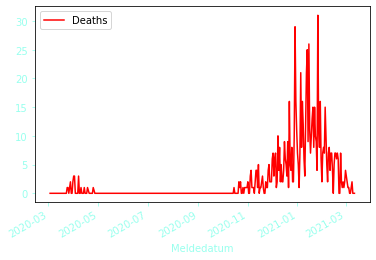

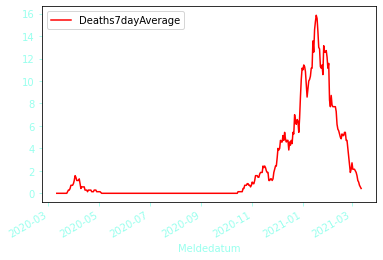

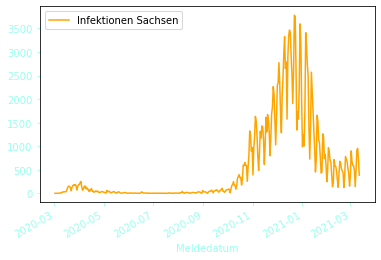

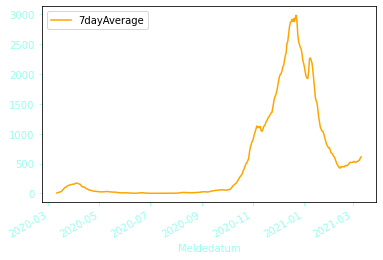

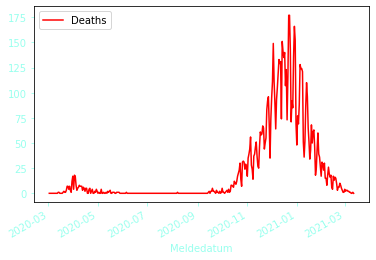

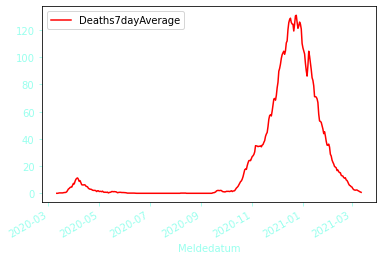

In [19]:
for region in ['Germany', 'Berlin', 'MeckPom', 'Sachsen']:
    call_plot_for_region(region)
    